I have removed guided comments and docstrings as they are of no use to seniors and it will give u a clean experience when reading the file. Tho if u want the one which had it , then u can see it [here](https://colab.research.google.com/drive/1i5yCdsgjtUQNSke-FnkUcyLEVHQBYgi3?usp=sharing).

The answers.txt is also available in the repo but i have also included answers here just after the quest as a comment for ease of access.

To view the current repo in collab , click [here](https://colab.research.google.com/drive/1pUW7cygkBlqzWHeFXqf7-3CrEAFK8eTk?usp=sharing).

In [1]:
import os, numpy as np, matplotlib.pyplot as plt
# folder = "./final/" # folder containing the data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import zipfile

zip = r'/content/drive/MyDrive/Storage abuse/Copy of fashion-minst.zip' #Please change the location acc to ur file

with zipfile.ZipFile(zip, 'r') as z:
    z.extractall('/content/mnistdataset')

folder = '/content/mnistdataset/final/'

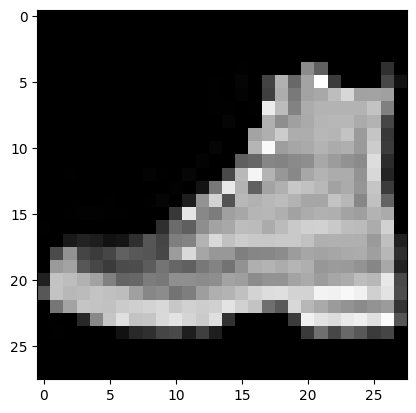

In [ ]:
x = './mnistdataset/final/9/11.png'
x = plt.imread(x)
img = plt.imshow(x)


In [ ]:
seed = "0100111001100101011101100110010101110010001000000110011101101111011011100110111001100001001000000110011101101001011101100110010100100000011110010110111101110101001000000111010101110000"
np.random.seed(abs(hash(seed))%2**32)

In [8]:

def load_data(X, y):
    for f in os.listdir(folder):
        for file in os.listdir(f"{folder}/{f}"):
            img = plt.imread(f"{folder}/{f}/{file}")
            X.append(img)

            # [Q1] But we dont use it here why? Why is it an array of 10 elements?

            label = [0] * 10
            label[int(f)] = 1 # Why is this array the label and not a numeber?

            y.append(label)

        print(f"Loaded {f} class")

X, y = [], []
load_data(X, y)

# [Q2] Why convert to numpy array?

X = np.array(X)
y = np.array(y)
print("Before reshaping")
print(X.shape, y.shape)
# print(X[0], y[0])

X = X[:, :,:, 0] # [Q3] Why are we doing this and what does this type of slicing result in?
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]) # [Q4] Why are we reshaping the data?
print("After reshaping")
print(X.shape, y.shape)
# print(X[0], y[0])


Loaded 4 class
Loaded 5 class
Loaded 2 class
Loaded 6 class
Loaded 3 class
Loaded 9 class
Loaded 7 class
Loaded 0 class
Loaded 8 class
Loaded 1 class
Before reshaping
(60000, 28, 28, 4) (60000, 10)
After reshaping
(60000, 784) (60000, 10)


In [9]:
class NN:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate, epochs, gamma = 1, step = 30 , beta = 0):

        self.input_neurons = input_neurons
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.epochs = epochs


        # for scheduler
        self.lr = learning_rate
        self.gamma = gamma
        self.step = step

        #for momentum
        self.beta = beta


        self.wih = np.random.randn(hidden_neurons, input_neurons) * np.sqrt(2/input_neurons)
        self.bih = np.zeros((hidden_neurons, 1))

        self.who = np.random.randn(output_neurons, hidden_neurons) * np.sqrt(2/hidden_neurons)
        self.bho = np.zeros((output_neurons, 1))

        #Introduced velocity
        self.v_wih = np.zeros_like(self.wih)
        self.v_who = np.zeros_like(self.who)
        self.v_bih = np.zeros_like(self.bih)
        self.v_bho = np.zeros_like(self.bho)

    def relu(self, z):
        return z * (z > 0)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def relu_derivative(self, z):
        return 1 * (z > 0)

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=0)

    def softmax_derivative(self, z):
        return z * (1 - z)

    def mean_squared_error(self, y, y_hat):
        return np.mean((y - y_hat) ** 2, axis=0)

    def cross_entropy_loss(self, y, y_hat):

        loss = np.sum(-y*np.log(y_hat), axis = 0 , keepdims=True)

        return loss

    def mean_squared_error_derivative(self, y, y_hat):
        #return y_hat - y        --------------------------> error ----> it should be 2*(y_hat-y)

        return 2*(y_hat - y)

    def cross_entropy_derivative(self, y, y_hat):

      return (y_hat-y)/self.softmax_derivative(y_hat)  #On solving, CEL_derivative*softmax_derivative = yhat-y
                                                       # so CEL_derivative = (yhat-y) / softmax_derivative


    # Forward propagation
    def forward(self, input_list):

        inputs = np.array(input_list, ndmin=2).T
        inputs = inputs - np.mean(inputs)

        x0 = inputs
        z1 = np.dot(self.wih, x0) + self.bih
        a1 = self.relu(z1)

        x1 = a1
        z2 = np.dot(self.who, x1) + self.bho
        a2 = self.softmax(z2)
        return a2

    def forward_modified(self, input_list):

        inputs = np.array(input_list, ndmin=2).T
        inputs = inputs - np.mean(inputs)
        x0 = inputs
        z1 = np.dot(self.wih, x0) + self.bih
        a1 = self.relu(z1)

        x1 = a1
        z2 = np.dot(self.who, x1) + self.bho
        a2 = self.softmax(z2)

        return {'yhat': a2,'final_inputs' : z2,"hidden_outputs": a1, "hidden_inputs":z1, 'inputs' : inputs}

    def backprop(self, inputs_list, targets_list):

        # inputs = np.array(inputs_list, ndmin=2).T # (784, n)
        # inputs = inputs - np.mean(inputs)

        values = self.forward_modified(inputs_list)

        tj = np.array(targets_list, ndmin=2).T                        #y

        # hidden_inputs = np.dot(self.wih, inputs) + self.bih
        # hidden_outputs = self.relu(hidden_inputs)

        hidden_inputs = values['hidden_inputs']
        hidden_outputs = values['hidden_outputs']



        # final_inputs = np.dot(self.who, hidden_outputs) + self.bho
        # yj = self.softmax(final_inputs)                                    #yhat

        final_inputs = values['final_inputs']
        yj = values["yhat"]

        # loss = self.mean_squared_error(tj, yj) # Convert this to cross entropy loss
        loss = self.cross_entropy_loss(tj, yj)

        # Change this to cross entropy loss
        # dE_dzo = self.mean_squared_error_derivative(tj, yj) * self.softmax_derivative(yj) # (10,n)

        dE_dzo = self.cross_entropy_derivative(tj, yj) * self.softmax_derivative(yj)


        dE_dwho = np.dot(dE_dzo, hidden_outputs.T) / hidden_outputs.shape[1]
        dE_dbho = np.mean(dE_dzo, axis=1, keepdims=True)


        inputs = values['inputs']
        # Hidden Layer
        dE_dah = np.dot(self.who.T, dE_dzo)
        dE_dzh = dE_dah * self.relu_derivative(hidden_inputs)
        dE_dwih = np.dot(dE_dzh, inputs.T) / inputs.shape[1]
        dE_dbih = np.mean(dE_dzh, axis=1, keepdims=True)


        # self.who -= self.lr * dE_dwho   #Commenting these to introduce momentum
        # self.bho -= self.lr * dE_dbho
        # self.wih -= self.lr * dE_dwih
        # self.bih -= self.lr * dE_dbih

        self.v_who = self.beta * self.v_who + (1 - self.beta) * dE_dwho
        self.v_bho = self.beta * self.v_bho + (1 - self.beta) * dE_dbho
        self.v_wih = self.beta * self.v_wih + (1 - self.beta) * dE_dwih
        self.v_bih = self.beta * self.v_bih + (1 - self.beta) * dE_dbih

        self.who -= self.lr * self.v_who
        self.bho -= self.lr * self.v_bho
        self.wih -= self.lr * self.v_wih
        self.bih -= self.lr * self.v_bih



        return np.mean(loss)

    def fit(self, inputs_list, targets_list,validation_data, validation_labels):

        train_loss = []
        val_loss = []
        for epoch in range(self.epochs):

            #-----------------    LOSS     ---------------#

            loss = self.backprop(inputs_list, targets_list)
            train_loss.append(loss)

            val_pred = self.forward(validation_data)
            val_actual = validation_labels.T
            vloss = np.mean(self.cross_entropy_loss(val_actual, val_pred))
            val_loss.append(vloss)

            #-----------------   ACCURACY  ----------------#

            #train acc
            tr_pred = self.forward(inputs_list).T   # tr_pred is y_pred for training
            tr_actual = targets_list                # tr_actual is y_test for training data

            tr_pred = np.argmax(tr_pred, axis = 1)
            tr_actual = np.argmax(tr_actual, axis = 1)

            train_acc = np.mean(tr_pred == tr_actual)*100

            #val acc
            val_pred = self.forward(validation_data).T
            val_actual = validation_labels

            val_pred = np.argmax(val_pred, axis = 1)
            val_actual = np.argmax(val_actual, axis = 1)

            val_acc = np.mean(val_pred == val_actual)*100


            print('-'*100)
            print(f"| Epoch: {epoch:.3f} | Loss: {loss:.5f} | Val Loss: {vloss:.5f} | Train acc: {train_acc:.2f}% | Val_acc : {val_acc:.2f}% |")
            # if epoch%step == 0 :
            #    self.lr = self.lr*self.gamma

        # return train_loss[1:], val_loss[:-1]
        return train_loss, val_loss

    def predict(self, X):
        outputs = self.forward(X).T
        return outputs

----------------------------------------------------------------------------------------------------
| Epoch: 0.000 | Loss: 2.39926 | Val Loss: 2.10631 | Train acc: 29.78% | Val_acc : 28.95% |
----------------------------------------------------------------------------------------------------
| Epoch: 1.000 | Loss: 2.10285 | Val Loss: 1.90423 | Train acc: 46.11% | Val_acc : 45.57% |
----------------------------------------------------------------------------------------------------
| Epoch: 2.000 | Loss: 1.90200 | Val Loss: 1.74613 | Train acc: 54.54% | Val_acc : 54.37% |
----------------------------------------------------------------------------------------------------
| Epoch: 3.000 | Loss: 1.74480 | Val Loss: 1.61654 | Train acc: 58.71% | Val_acc : 58.81% |
----------------------------------------------------------------------------------------------------
| Epoch: 4.000 | Loss: 1.61565 | Val Loss: 1.50798 | Train acc: 61.15% | Val_acc : 61.19% |
-----------------------------------

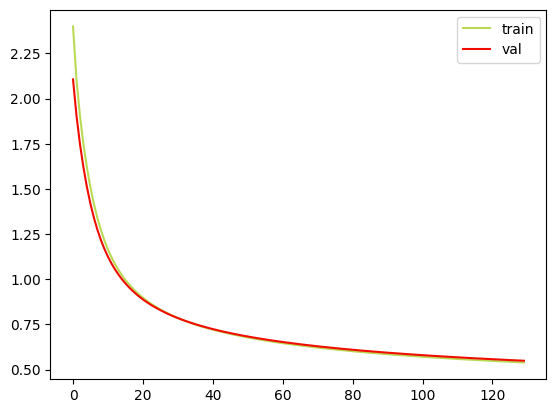

In [10]:
seed = "0100111001100101011101100110010101110010001000000110011101101111011011100110111001100001001000000110011101101001011101100110010100100000011110010110111101110101001000000111010101110000"
np.random.seed(abs(hash(seed))%2**32)



fashion_mnist = NN(784, 190, 10, 0.12, 130)
# No matter what , its saturating at around 80%. Tried scheduling lr , tried momentum, but nothing working.


p = np.random.permutation(len(X))
X, y = X[p], y[p]

# Splitting the data into training, validation and testing in the ratio 70:20:10
X_train, y_train = X[:int(0.7*len(X))], y[:int(0.7*len(X))]
X_val, y_val = X[int(0.7*len(X)):int(0.9*len(X))], y[int(0.7*len(X)):int(0.9*len(X))]
X_test, y_test = X[int(0.9*len(X)):], y[int(0.9*len(X)):]

# Training the model
train_loss,val_loss = fashion_mnist.fit(X_train, y_train,X_val,y_val)


# Plotting the loss
plt.plot(train_loss,label='train', color = '#BADA55')
plt.plot(val_loss,label='val', color = '#F00D00')
plt.legend()
plt.show()



In [ ]:
# IGNORE


# fashion_mnist = NN(784, 160, 10, 0.03, 130) # ---> Accuracy: 74.67 %   ----> Default
# fashion_mnist = NN(784, 160, 10, 0.08, 130) # ---> Accuracy: 80.12 %
# fashion_mnist = NN(784, 190, 10, 0.12, 130) # ---> Accuracy: 80.48 % --> train loss 0.618 at 59th epoch to 0.616 at the 60th epoch --> very slow learning so i am introducing momentum
# fashion_mnist = NN(784, 190, 10, 0.01, 130, 1, 44, 0.9)   #----> introduced momentum  # Accuracy : 67.38%
# fashion_mnist = NN(784, 190, 10, 0.1, 90, 1, 44, 0.9)   # Accuracy: 80.12 %
# fashion_mnist = NN(784, 256, 10, 0.1, 90, 1, 44, 0.9)   # Accuracy: 79.57 %


In [11]:
y_pred = fashion_mnist.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
print(f"Accuracy: {np.mean(y_pred == y_test)*100:.2f} %")

Accuracy: 80.42 %


In [ ]:
y_val.shape

(12000, 10)